
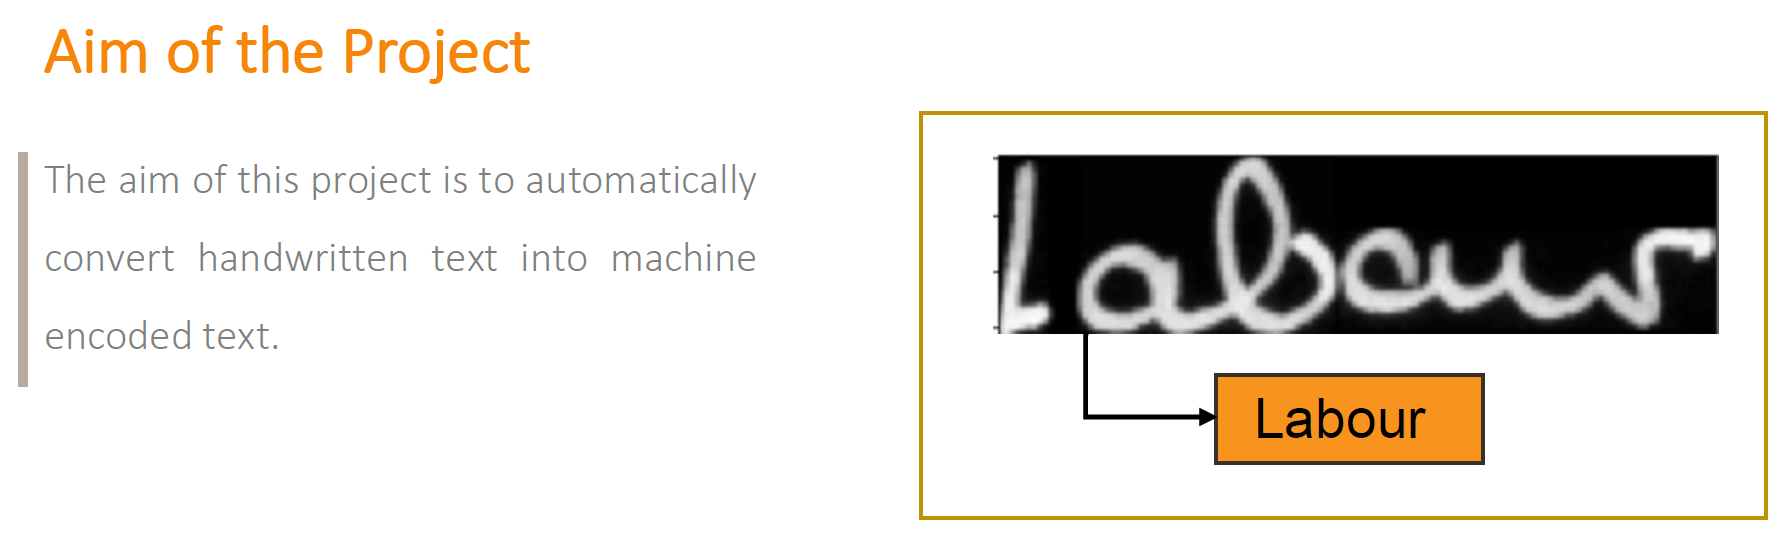


## Download data from Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pwd

'/content'

##1. Preprocess image and text data

In [3]:
cd "/content/drive/My Drive/Deep learning/mid_term_project2"

/content/drive/My Drive/Deep learning/mid_term_project2


In [4]:
!ls

'1_ Mid_term_project_2.ipynb'	  Images_all.pickle   Mid_term_project_2.ipynb
 error_path.txt			  Images.pickle       parser.txt
 Final_Mid_term_project_2.ipynb   label_all.csv       words
 htr_model.hdf5			  label.csv	      words.zip


Download the images using the following link:
https://drive.google.com/file/d/1idCx6pr1ptmHrEHjbbiQxF4xoCZ9dNtv/view?usp=sharing

In [5]:
#!gdown --id "1idCx6pr1ptmHrEHjbbiQxF4xoCZ9dNtv"

Download the text use the following link:
https://drive.google.com/file/d/1lZA6WjzssJQYBEN7XLq4rhtxuRpqqmhT/view?usp=sharing

In [6]:
#!gdown --id "1lZA6WjzssJQYBEN7XLq4rhtxuRpqqmhT"

Extracting data to local file system

In [7]:
#!unzip "words.zip" -d "./words/"

Read the parser file having data of intrest

In [8]:
with open('parser.txt') as f:
    lines = f.readlines()
print(lines[115315:])
print(len(lines))

['r06-143-04-06 ok 186 1323 1428 64 77 PP3O him\n', 'r06-143-04-07 ok 186 1458 1469 36 52 IN in\n', 'r06-143-04-08 ok 186 1532 1445 73 72 ATI the\n', 'r06-143-04-09 ok 186 1654 1444 199 114 NN garden\n', 'r06-143-04-10 ok 186 1892 1453 36 66 ? ?']
115320


In [9]:
l = []
for i in (lines):
  l.append(i.split(' '))
l[:5][1],l[:1][0][0]

(['a01-000u-00-01', 'ok', '154', '507', '766', '213', '48', 'NN', 'MOVE\n'],
 'a01-000u-00-00')

Sorting the image according to the parser and size limit and save locally 

In [10]:
import cv2
import numpy as np

# resize image (paded base + Image)
def resize_img(ip_img):
  image = ip_img
  ht, wd = image.shape[0],image.shape[1]
  # create new image of required size and color for padding
  ww = 128 
  hh = 32
  color = (0,0,0)
  result = 255 * np.ones((32,128), np.uint8)
  # set offsets for top left corner
  xx = 0
  yy = 0
  # copy img image into center of result image
  result[yy:yy+ht, xx:xx+wd] = image
  return result

####Load data and resize to (32,128) accoring to the parser.txt
def load_data(len):
  output = []
  images = []
  labels = []
  datacnt = 0
  cnt = 0

  # Iterate through each folder corresponding to a category
  for inp in l[:len]:
      datacnt += 1
      label = inp[-1:][0]
      s = inp[0].split("-")
      ext = inp[0]+'.png'
      path = "/content/drive/My Drive/Deep learning/mid_term_project2/words/words/"+s[0]+"/"+s[0]+"-"+s[1]+"/"+ext
      curr_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
      #curr_img = cv2.resize(curr_img, (128,32))
      
      if curr_img is None:
        print("Couldn't open file %s" % path)
        f = open("error_path.txt", "a")
        f.writelines([f'\n{path}'])
        f.close()
      else:
        w, h = curr_img.shape

        if h > 128 or w > 32:
            continue
        if w <= 32:
            
            add_zeros = np.ones((32-w, h))*255
            curr_img = np.concatenate((curr_img, add_zeros))

        if h <= 128:
            
            add_zeros = np.ones((32, 128-h))*255
            curr_img = np.concatenate((curr_img, add_zeros), axis=1)

        images.append(curr_img)
        labels.append(label)
        cnt += 1
        print(datacnt, cnt)
  return images,labels

In [11]:
#img,lab = load_data(len=115319)

Save resized images

In [12]:
# save images locally
#import pickle

#with open("Images_all.pickle", "wb") as file:
#    pickle.dump(img, file)


 Save corresponding text labels

In [13]:
#import pandas as pd

#df = pd.DataFrame({'label': lab})
#df['label']=df.label.str.rstrip('\n')
#df.to_csv('label_all.csv', index = False)


In [14]:
# Load the image file
import pickle
# load images
with open("Images_all.pickle", "rb") as file:
    images = pickle.load(file)

In [16]:
# load the label text file
import pandas as pd
data = pd.read_csv('label_all.csv')
data.head()

,label
0,.
1,a
2,on
3,.
4,.


Normalize all the images

In [17]:
import numpy as np
X =  np.array(images[:], dtype = 'float32') 
X = X / 255
X = np.expand_dims(X , axis = 3)
X.shape

(13440, 32, 128, 1)

In [18]:
y = data['label'][:]
y.shape

(13440,)

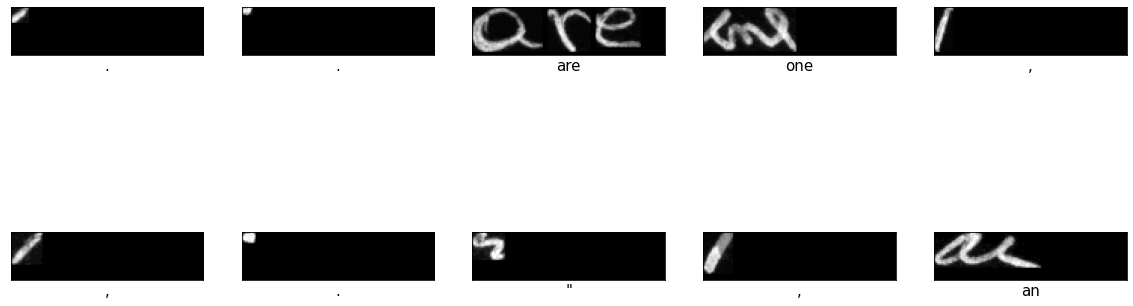

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
randomlist = random.sample(range(0, 13439), 10)

fig = plt.figure(figsize=(20,20))

for i,j in enumerate(randomlist):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[j].reshape(32,128) , cmap = 'gray_r')
  plt.xlabel(y[j], fontsize=15)
plt.show()

In [21]:
# Get all alphabets to one list
y_cat = y.apply(lambda x: [y for y in x])
c = []
for i in y_cat:
  for j in i:
    c.append(j)
u_l = np.unique(c)
#print(u_l)

# Get the special char in the labels
import string
spl_char = []
for i in u_l:
  if i not in string.ascii_letters+string.digits:
    spl_char.append(i)
spl_char=''.join(spl_char)
spl_char

'!"#&\'(),-.:;?'

In [22]:
import string
char_list = string.ascii_letters+string.digits
char_list.split(',')

for i,v in enumerate(char_list):
  print(i,':',v)

0 : a
1 : b
2 : c
3 : d
4 : e
5 : f
6 : g
7 : h
8 : i
9 : j
10 : k
11 : l
12 : m
13 : n
14 : o
15 : p
16 : q
17 : r
18 : s
19 : t
20 : u
21 : v
22 : w
23 : x
24 : y
25 : z
26 : A
27 : B
28 : C
29 : D
30 : E
31 : F
32 : G
33 : H
34 : I
35 : J
36 : K
37 : L
38 : M
39 : N
40 : O
41 : P
42 : Q
43 : R
44 : S
45 : T
46 : U
47 : V
48 : W
49 : X
50 : Y
51 : Z
52 : 0
53 : 1
54 : 2
55 : 3
56 : 4
57 : 5
58 : 6
59 : 7
60 : 8
61 : 9


For text data convert each word to encoded text, give an ID to each character.

In [23]:
# encoding each output word into digits
def encode_to_labels(txt):
    
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            pass
        
    return dig_lst

 Use that ID to generate encoded text.

In [278]:
num_data = 13440
org_txt_all = []  # Contains actual text
code_txt_all = [] # Contains coded form of actual text
img_list_all = [] # Contains images
label_length_all = [] #Contains actual text lengths
input_length_all = [] #Contains max of lable len

for idx,txt in enumerate(y[:num_data]):
  if len(txt)>=2:
    org_txt_all.append(txt)
    img_list_all.append(X[idx])
    code_txt_all.append(encode_to_labels(txt))
    label_length_all.append(len(txt))
    input_length_all.append(31)



In [279]:
len(org_txt_all),len(code_txt_all),len(img_list_all),len(label_length_all),len(input_length_all)

(1889, 1889, 1889, 1889, 1889)

In [280]:
org_txt , test_org_txt = org_txt_all[:1850] , org_txt_all[1851:]
code_txt , test_code_txt = code_txt_all[:1850] , code_txt_all[1851:]
img_list , test_img_list = img_list_all[:1850] , img_list_all[1851:]
label_length , test_label_length = label_length_all[:1850] , label_length_all[1851:]
input_length , test_input_length = input_length_all[:1850] , input_length_all[1851:]

# Contains actual text
# Contains coded form of actual text
# Contains images
#Contains actual text lengths
#Contains max of lable len


In [281]:
len(org_txt),len(code_txt),len(img_list),len(label_length),len(input_length)

(1850, 1850, 1850, 1850, 1850)

In [282]:
len(test_org_txt),len(test_code_txt),len(test_img_list),len(test_label_length),len(test_input_length)

(38, 38, 38, 38, 38)

Here we are duplicating the datapoints having only text length >= 2.

In [283]:
org_txt = org_txt+org_txt+org_txt+org_txt+org_txt+org_txt[:750]
code_txt = code_txt+code_txt+code_txt+code_txt+code_txt+code_txt[:750]
img_list = img_list+img_list+img_list+img_list+img_list+img_list[:750]
label_length = label_length+label_length+label_length+label_length+label_length+label_length[:750]
input_length =input_length+input_length+input_length+input_length+input_length+input_length[:750]

In [284]:
len(org_txt),len(code_txt),len(img_list),len(label_length),len(input_length)

(10000, 10000, 10000, 10000, 10000)

In [285]:
# Get max possible char length
max_char_len = max(label_length)
max_char_len

10

In [286]:
np.unique(label_length)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

Separate the datafor test

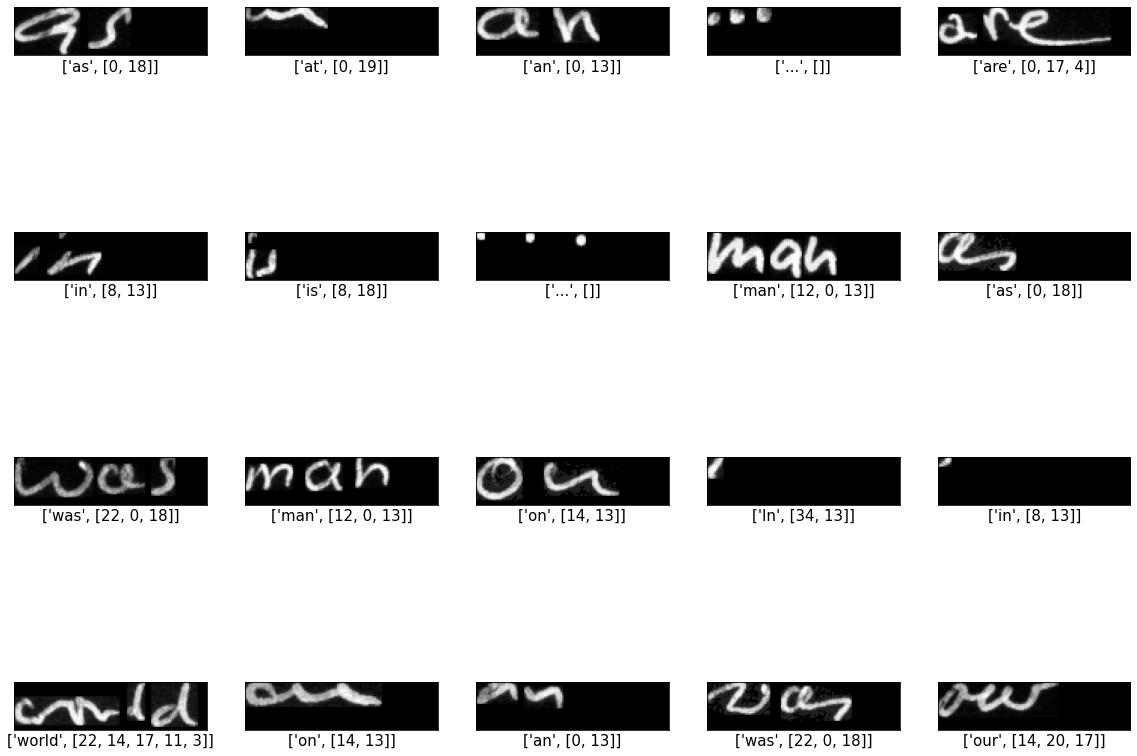

[184, 8748, 183, 8926, 2414, 7287, 5746, 1484, 4776, 8547, 5332, 3349, 9869, 5891, 6228, 3912, 3873, 1128, 6702, 8256]


In [287]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
randomlist = random.sample(range(0, len(org_txt)-1), 20)

fig = plt.figure(figsize=(20,20))

for i,j in enumerate(randomlist):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_list[j].reshape(32,128) , cmap = 'gray_r')
  plt.xlabel([org_txt[j],code_txt[j]], fontsize=15)
plt.show()
print(randomlist)

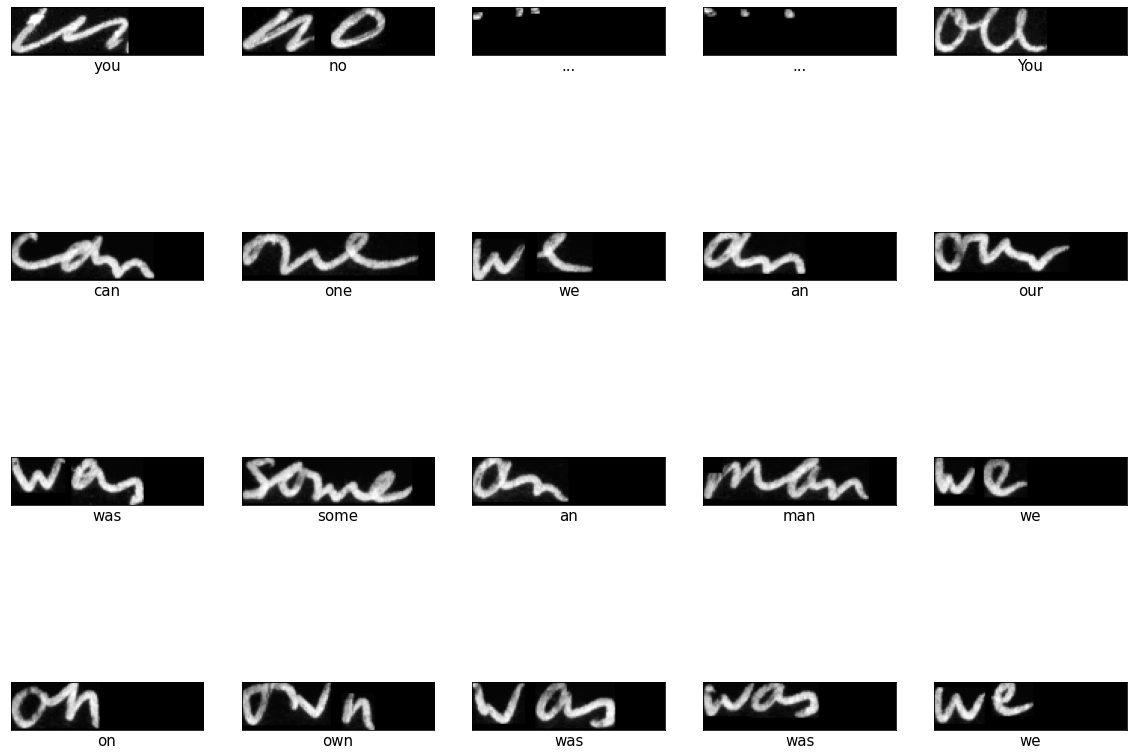

[10, 4, 15, 9, 31, 25, 17, 6, 13, 0, 30, 8, 23, 19, 18, 1, 35, 29, 33, 5]


In [289]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
randomlist = random.sample(range(0, len(test_org_txt)-1), 20)

fig = plt.figure(figsize=(20,20))

for i,j in enumerate(randomlist):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_img_list[i].reshape(32,128) , cmap = 'gray_r')
  plt.xlabel(test_org_txt[i], fontsize=15)
plt.show()
print(randomlist)

In [290]:
np.unique(test_label_length)

array([2, 3, 4])

In [291]:
# Get all lebel data to a DF to use in train_test_split
y_df = pd.DataFrame(np.array(code_txt),
                   columns=['y_coded'])
y_df['label_length'] = label_length
y_df['input_length'] = input_length
y_df['org_txt'] = org_txt
y_df

,y_coded,label_length,input_length,org_txt
0,"[14, 13]",2,31,on
1,"[0, 18]",2,31,as
2,"[13, 14, 22]",3,31,now
3,"[20, 15]",2,31,up
4,"[11, 8, 13, 4]",4,31,line
...,...,...,...,...
9995,"[22, 0, 18]",3,31,was
9996,"[19, 14, 14]",3,31,too
9997,"[33, 4]",2,31,He
9998,"[14, 13, 4]",3,31,one


Split with 90:10 ratio

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_list, y_df, test_size=0.10, random_state=42)

In [293]:
np.shape(X_train),y_train.shape,np.shape(X_test),y_test.shape

((9000, 32, 128, 1), (9000, 4), (1000, 32, 128, 1), (1000, 4))

# 2. CNN layers for feature extraction model
# 3. Bi-LSTM layers to learn the sequential data in the image

In [383]:
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D,Bidirectional,LSTM,Lambda,Input,MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.models import Model

# input with shape of height=32 and width=128 
inputs = Input(shape=(32,128,1))
 
convolution1 = Conv2D(filters=64, kernel_size=(1,1))(inputs)
convolution1 = BatchNormalization(axis = -1)(convolution1)
convolution1 = Activation("relu")(convolution1)

convolution2 = Conv2D(filters=64, kernel_size=(1,1))(convolution1)
convolution2 = BatchNormalization(axis = -1)(convolution2)
convolution2 = Activation("relu")(convolution2)

pooling1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution2)

convolution3 = Conv2D(filters=128, kernel_size=(1,1))(pooling1)
convolution3 = BatchNormalization(axis = -1)(convolution3)
convolution3 = Activation("relu")(convolution3)

convolution4 = Conv2D(filters=128, kernel_size=(1,1))(convolution3)
convolution4 = BatchNormalization(axis = -1)(convolution4)
convolution4 = Activation("relu")(convolution4)

pooling2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(convolution4)

convolution5 = Conv2D(filters=256, kernel_size=(1,1))(pooling2)
convolution5 = BatchNormalization(axis = -1)(convolution5)
convolution5 = Activation("relu")(convolution5)

convolution6 = Conv2D(filters=256, kernel_size=(1,1))(convolution5)
convolution6 = BatchNormalization(axis = -1)(convolution6)
convolution6 = Activation("relu")(convolution6)

convolution7 = Conv2D(filters=256, kernel_size=(1,1))(convolution6)
convolution7 = BatchNormalization(axis = -1)(convolution7)
convolution7 = Activation("relu")(convolution7)

pooling3 = MaxPooling2D(pool_size=(2,1), strides=(2,1))(convolution7)

convolution8 = Conv2D(filters=512, kernel_size=(1,1))(pooling3)
convolution8 = BatchNormalization(axis = -1)(convolution8)
convolution8 = Activation("relu")(convolution8)

convolution9 = Conv2D(filters=512, kernel_size=(1,1))(convolution8)
convolution9 = BatchNormalization(axis = -1)(convolution9)
convolution9 = Activation("relu")(convolution9)

convolution10 = Conv2D(filters=512, kernel_size=(1,1))(convolution9)
convolution10= BatchNormalization(axis = -1)(convolution10)
convolution10 = Activation("relu")(convolution10)

pooling4 = MaxPooling2D(pool_size=(2,1), strides=(2,1))(convolution10)

convolution11 = Conv2D(filters=512, kernel_size=(1,1))(pooling4)
convolution11= BatchNormalization(axis = -1)(convolution11)
convolution11 = Activation("relu")(convolution11)

convolution12 = Conv2D(filters=512, kernel_size=(1,1))(convolution11)
convolution12= BatchNormalization(axis = -1)(convolution12)
convolution12 = Activation("relu")(convolution12)

convolution13 = Conv2D(filters=512, kernel_size=(1,1))(convolution12)
convolution13= BatchNormalization(axis = -1)(convolution13)
convolution13 = Activation("relu")(convolution13)

pooling5 = MaxPooling2D(pool_size=(2,1), strides=(2,1))(convolution13)
convolution14 = Conv2D(512, (1,2), activation = 'relu')(pooling5)
squeezed = Lambda(lambda x: K.squeeze(x, 1))(convolution14)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True))(blstm_1)

# The output of size (batch_size, 31, 76). Where 76 is the total number of output classes including blank character.
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# Combine to model
act_model = Model(inputs, outputs)

# 4. Use CTC_loss and CTC_decode (Connectionist Temporal Categorical)

A CTC loss function requires four arguments to compute the loss => predicted outputs, ground truth labels, input sequence length to LSTM and ground truth label length.

In [384]:
labels = Input(name='the_labels', shape=[max_char_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 

The output sequence from the output layer will be fed to the CTC layer. A normal loss function optimizes just one objective, but CTC optimizes both the length of the word and the classes of the predicted sequence of characters.

In [385]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [386]:
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

Model takes above four inputs and outputs the loss.

In [387]:
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [388]:
from keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adamax,Nadam,Adagrad
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)
#opt = Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-07)
#opt = Adadelta(learning_rate=0.0001, rho=1, epsilon=1e-07)
#opt = Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt = Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07)
opt = RMSprop(learning_rate=0.0001,rho=0.9,momentum=0.9,epsilon=1e-07)

In model.compile(), only taken y_pred and neglected y_true as labels already taken as input to the model earlier.

In [389]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = opt, metrics=['accuracy'])
 
model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 128, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 32, 128, 64)  128         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 32, 128, 64)  256         conv2d_70[0][0]                  
__________________________________________________________________________________________________
activation_65 (Activation)      (None, 32, 128, 64)  0           batch_normalization_65[0][0]     
______________________________________________________________________________________

Callbacks to save the weights of the best model monitoring validation loss.

In [390]:
checkpoint = ModelCheckpoint(filepath="htr_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
#es = EarlyStopping (monitor= 'val_loss',patience= 10)
lrp = ReduceLROnPlateau(monitor= 'val_loss' ,patience = 10)
callbacks_list = [checkpoint,lrp]

Create 4 individual inputs for train and validtion as per above model

In [391]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

training_img = np.array(X_train)
train_input_length = np.array(y_train['input_length'])
train_label_length = np.array(y_train['label_length'])
# Pad the coded text to max length with the maximum encodednum+1 as this is for the char outside our list
train_padded_txt = pad_sequences(y_train['y_coded'], maxlen=max_char_len, padding='post', value = len(char_list))
train_org_txt = np.array(y_train['org_txt'])

valid_img = np.array(X_test)
valid_input_length = np.array(y_test['input_length'])
valid_label_length = np.array(y_test['label_length'])
# Pad the coded text to max length with the maximum encodednum+1 as this is for the char outside our list
valid_padded_txt = pad_sequences(y_test['y_coded'], maxlen=max_char_len, padding='post', value = len(char_list))
valid_org_txt = np.array(y_test['org_txt'])

In [392]:
train_padded_txt[1]

array([14, 17, 62, 62, 62, 62, 62, 62, 62, 62], dtype=int32)

In [393]:
np.unique(valid_label_length)

array([2, 3, 4, 5, 6, 7, 8])

In [394]:
batch_size = 252
epochs = 100
history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], y=train_padded_txt, 
          batch_size=batch_size, epochs = epochs, validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], valid_padded_txt),shuffle=True,
          verbose = 1, callbacks = callbacks_list)

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 15.3200 - accuracy: 5.0000e-04
Epoch 00001: val_loss improved from inf to 7.44449, saving model to htr_model.hdf5
36/36 [==============================] - 10s 289ms/step - loss: 15.3200 - accuracy: 5.0000e-04 - val_loss: 7.4445 - val_accuracy: 7.0000e-04
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 6.9675 - accuracy: 5.0000e-04
Epoch 00002: val_loss did not improve from 7.44449
36/36 [==============================] - 8s 223ms/step - loss: 6.9675 - accuracy: 5.0000e-04 - val_loss: 7.4703 - val_accuracy: 7.0000e-04
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 6.4635 - accuracy: 5.0000e-04
Epoch 00003: val_loss did not improve from 7.44449
36/36 [==============================] - 8s 225ms/step - loss: 6.4635 - accuracy: 5.0000e-04 - val_loss: 7.8168 - val_accuracy: 7.0000e-04
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 6.0092 - accuracy: 5.0000e-04

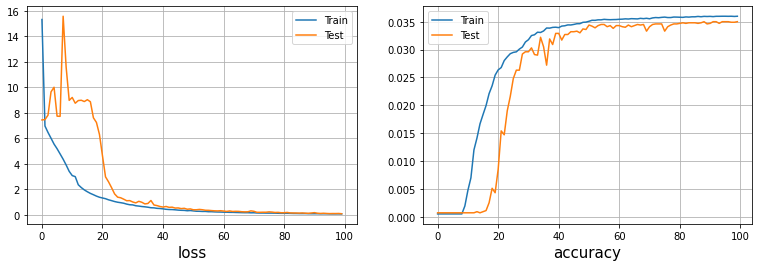

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(13,4))
mat = [['loss','val_loss'],['accuracy','val_accuracy']]

for i in range(2):
  plt.subplot(1,2,i+1)
  for j in range(2):
    plt.plot(history.history[mat[i][j]])
    plt.legend(['Train','Test'])
    plt.xlabel(mat[i][0], fontsize=15)
  plt.grid()
plt.show()

In [396]:
# load the saved model weights
act_model.load_weights('htr_model.hdf5')

The test data to check how model respond to the new images

In [397]:

test_img = np.array(test_img_list)
test_input_length = np.array(test_input_length)
test_label_length = np.array(test_label_length)
# Pad the coded text to max length with the maximum encodednum+1 as this is for the char outside our list
test_padded_txt = pad_sequences(test_code_txt, maxlen=max_char_len, padding='post', value = len(char_list))
test_org_txt = np.array(test_org_txt)

to test the model we will use ” act_model ” which takes only test images as input.

In [420]:
valid_sp = []
index = []
valid_img_sp = []
for i,v in enumerate(valid_org_txt[:]):
  if len(v) >= 2:
    valid_sp.append(v)
    index.append(i)
for i in index:
  valid_img_sp.append(valid_img[i])
valid_img_sp = np.array(valid_img_sp)

In [421]:
len(valid_img_sp)

1000

In [422]:
# prediction on validation images
prediction = act_model.predict(valid_img_sp[:])

ctc_decode used to get the final prediction.

In [423]:
# CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])

In [424]:
out

array([[ 0, 13, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [14, 20, 17, ..., -1, -1, -1],
       ...,
       [ 2,  0, 13, ..., -1, -1, -1],
       [ 0, 18, -1, ..., -1, -1, -1],
       [ 0, 13, -1, ..., -1, -1, -1]])

In [425]:
# see the results
pred_txt= []
for arr in out:
  arr = arr[arr != -1]
  txt = ''
  for p in range(len(arr)):
    txt = txt+char_list[int(arr[p])]
  pred_txt.append(txt)

cnt = 0
for i in range(len(out)):
    if valid_sp[i] == pred_txt[i]:
      cnt += 1

print("Out of",len(out),"data =>","\npredicted correctly :",cnt,"\npredictedincorrectly :",len(out)-cnt)

Out of 1000 data => 
predicted correctly : 914 
predictedincorrectly : 86


In [426]:
# see the results
for i in range(len(out)):
    if valid_sp[i] == pred_txt[i]:
      print("Original text:", valid_sp[i], "=>>","Predicted text:", pred_txt[i],"==>>matched")
    else:
      print("Original text:", valid_sp[i], "=>>","Predicted text:", pred_txt[i])

Original text: an =>> Predicted text: an ==>>matched
Original text: ... =>> Predicted text: 
Original text: our =>> Predicted text: our ==>>matched
Original text: no =>> Predicted text: no ==>>matched
Original text: was =>> Predicted text: was ==>>matched
Original text: as =>> Predicted text: as ==>>matched
Original text: no =>> Predicted text: no ==>>matched
Original text: or =>> Predicted text: or ==>>matched
Original text: new =>> Predicted text: new ==>>matched
Original text: was =>> Predicted text: was ==>>matched
Original text: man =>> Predicted text: man ==>>matched
Original text: or =>> Predicted text: or ==>>matched
Original text: was =>> Predicted text: was ==>>matched
Original text: on =>> Predicted text: on ==>>matched
Original text: now =>> Predicted text: now ==>>matched
Original text: an =>> Predicted text: an ==>>matched
Original text: on =>> Predicted text: on ==>>matched
Original text: are =>> Predicted text: are ==>>matched
Original text: was =>> Predicted text: was 